In [1]:
# Sample API
import flowx
import simulation
flowx.__version__

'0.1.dev'

In [2]:
# Define grid parameters
nx, ny = 50, 100
xmin, xmax = -2.5, 2.5
ymin, ymax = -5.0, 5.0

# Define cell-centered variable names
center_vars   = ['pres', 'divv']
face_vars     = ['velc', 'hvar', 'ibmf']
ins_vars      = ['velc', 'hvar', 'divv', 'pres']
poisson_vars  = ['pres', 'divv']
imbound_vars  = ['ibmf', 'velc']

scalar_info   = {'tmax' : 8, 
                 'dt' : 0.01, 
                 'Re' : 100.0}

simulation_info = {'time_stepping' : 'ab2', 
                   'poisson_solver' : 'serial_cg', 
                   'maxiter' : 2000,
                   'tol' : 1e-10,
                   'with_ib' : True}

particle_info = [{'xo': 0.0, 'yo':  4.0, 'radius': 0.5, 'vely': -1.0}]

# Define boundary conditions for variable pressure and velocity [left, right, bottom, top]
bc_type_center = {'pres': ['neumann', 'neumann', 'neumann', 'neumann']}
bc_val_center  = {'pres': [0.0, 0.0, 0.0, 0.0]}

bc_type_facex = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_facex  = {'velc': [0.0, 0.0, 0.0, 0.0]}

bc_type_facey = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_facey  = {'velc': [0.0, 0.0, 0.0, 0.0]}

# Create the grid and data
gridc, gridx, gridy, scalars, particles = flowx.serial.domain_main(nx, ny, xmin, xmax, ymin, ymax,
                                              center_vars, face_vars, scalar_info, particle_info, 
                                              bc_type_center=bc_type_center, bc_val_center=bc_val_center,
                                              bc_type_facex=bc_type_facex, bc_val_facex=bc_val_facex,
                                              bc_type_facey=bc_type_facey, bc_val_facey=bc_val_facey)

domain_data_struct = [gridc, gridx, gridy, scalars, particles]

ins = flowx.ins_main(ins_vars, simulation_info)

poisson = flowx.poisson_main(poisson_vars, simulation_info)

imbound = flowx.imbound_main(imbound_vars, simulation_info)

------------ Time = 0.01 ---------------
Number of poisson iterations    : 287
Final poisson residual : 7.308000254261599e-11
Max, Min, U   : 0.45222823672906537, -0.4522282367270911
Max, Min, V   : 0.4062359938079111, -0.5582852536072826
Max, Min, P   : 18.277357531016854, -34.05406489677725
Max, Min, DIV : 3.990194501202193e-09, -3.9429754079833845e-09


------------ Time = 0.02 ---------------
Number of poisson iterations    : 275
Final poisson residual : 9.363168288752211e-11
Max, Min, U   : 0.7009957902622814, -0.7009957902839372
Max, Min, V   : 0.6183686068764718, -0.8092687121020139
Max, Min, P   : 10.86930154096676, -20.323090658573147
Max, Min, DIV : 4.697845578820653e-09, -5.40452247408188e-09


------------ Time = 0.03 ---------------
Number of poisson iterations    : 270
Final poisson residual : 8.024058062340601e-11
Max, Min, U   : 0.8595909250175456, -0.8595909250214959
Max, Min, V   : 0.7639896362298937, -0.907817675565997
Max, Min, P   : 6.566827814111088, -12.241741588

------------ Time = 0.26000000000000006 ---------------
Number of poisson iterations    : 288
Final poisson residual : 7.35520239441405e-11
Max, Min, U   : 0.919672042756036, -0.9197784186779103
Max, Min, V   : 0.6605729361508278, -1.0429778821724354
Max, Min, P   : 0.33911174306470115, -1.3512055714258817
Max, Min, DIV : 4.429642377727638e-09, -4.65140230845873e-09


------------ Time = 0.2700000000000001 ---------------
Number of poisson iterations    : 316
Final poisson residual : 9.398033602757707e-11
Max, Min, U   : 0.9038166436334123, -0.9051244975686117
Max, Min, V   : 0.6569389931904155, -1.0455453730686364
Max, Min, P   : 1.1611526042482683, -1.7908128187687657
Max, Min, DIV : 5.0487228807349904e-09, -5.123199531276157e-09


------------ Time = 0.2800000000000001 ---------------
Number of poisson iterations    : 323
Final poisson residual : 8.68411482922588e-11
Max, Min, U   : 0.8875731430940235, -0.8883205703224404
Max, Min, V   : 0.6493972506867507, -1.0464686165819266
Max, 

------------ Time = 0.49000000000000027 ---------------
Number of poisson iterations    : 276
Final poisson residual : 9.10818763468197e-11
Max, Min, U   : 0.780120658597832, -0.7803794495100324
Max, Min, V   : 0.5868923503598841, -1.11263162781014
Max, Min, P   : 1.047380553347625, -1.3165601347714122
Max, Min, DIV : 4.188209640210161e-09, -5.174863203660123e-09


------------ Time = 0.5000000000000002 ---------------
Number of poisson iterations    : 273
Final poisson residual : 8.756472826169819e-11
Max, Min, U   : 0.7729480022247832, -0.7732073982780014
Max, Min, V   : 0.5862317327917345, -1.1124366858422354
Max, Min, P   : 0.7957447982734982, -1.0870438348819416
Max, Min, DIV : 5.026605409685914e-09, -4.913369433534598e-09


------------ Time = 0.5100000000000002 ---------------
Number of poisson iterations    : 268
Final poisson residual : 9.591057426207798e-11
Max, Min, U   : 0.7656616572788921, -0.7659208903395793
Max, Min, V   : 0.5864371792961156, -1.111527459767014
Max, Min,

------------ Time = 0.7500000000000004 ---------------
Number of poisson iterations    : 270
Final poisson residual : 9.746277217105882e-11
Max, Min, U   : 0.6900626647741575, -0.6901975000909741
Max, Min, V   : 0.5522923657934892, -1.2461582131230975
Max, Min, P   : 0.5538788480596372, -1.2691090521614898
Max, Min, DIV : 4.775124358153814e-09, -5.265404625439014e-09


------------ Time = 0.7600000000000005 ---------------
Number of poisson iterations    : 267
Final poisson residual : 9.389795187846204e-11
Max, Min, U   : 0.68474006766348, -0.6848676668222187
Max, Min, V   : 0.5507608660749315, -1.2497551562509723
Max, Min, P   : 0.325523226583597, -1.11096334345329
Max, Min, DIV : 4.794613369524248e-09, -4.6570782885439754e-09


------------ Time = 0.7700000000000005 ---------------
Number of poisson iterations    : 311
Final poisson residual : 8.64831932645241e-11
Max, Min, U   : 0.6918559018644116, -0.6799248820095349
Max, Min, V   : 0.5496923905665478, -1.2526216562509183
Max, Min,

------------ Time = 0.9900000000000007 ---------------
Number of poisson iterations    : 312
Final poisson residual : 7.337068844553265e-11
Max, Min, U   : 0.6711172911459045, -0.6706900442370577
Max, Min, V   : 0.5212488043904266, -1.345428519317134
Max, Min, P   : 1.0012366963385, -1.16243576764949
Max, Min, DIV : 4.815054147067066e-09, -4.572504755037676e-09


------------ Time = 1.0000000000000007 ---------------
Number of poisson iterations    : 309
Final poisson residual : 7.67808040129138e-11
Max, Min, U   : 0.6815031764650014, -0.6803458015608426
Max, Min, V   : 0.5203092014450816, -1.3508111961981282
Max, Min, P   : 0.7643944066310951, -0.9516316951352954
Max, Min, DIV : 4.588834034979783e-09, -4.5476308214499085e-09




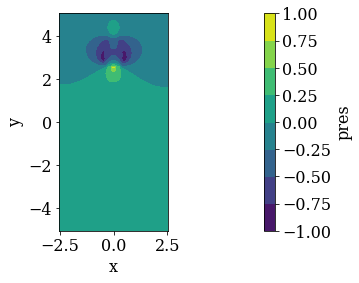

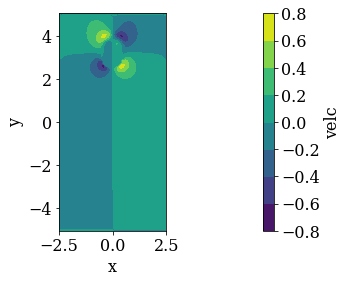

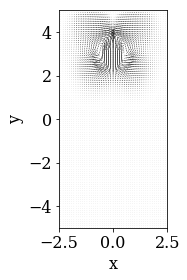

------------ Time = 1.0100000000000007 ---------------
Number of poisson iterations    : 293
Final poisson residual : 9.913367046542596e-11
Max, Min, U   : 0.6792285942473618, -0.6776419836690769
Max, Min, V   : 0.5201833356221549, -1.3553341561227974
Max, Min, P   : 0.6352570857455369, -1.8305598074739913
Max, Min, DIV : 4.73731544140335e-09, -5.300386539180621e-09


------------ Time = 1.0200000000000007 ---------------
Number of poisson iterations    : 292
Final poisson residual : 9.410336384234493e-11
Max, Min, U   : 0.6674217957129026, -0.6654818371644486
Max, Min, V   : 0.5188389251600638, -1.3583746362462499
Max, Min, P   : 0.8817033688259532, -1.6236226092579205
Max, Min, DIV : 5.051059015492854e-09, -5.228092405610424e-09


------------ Time = 1.0300000000000007 ---------------
Number of poisson iterations    : 288
Final poisson residual : 9.105344838884047e-11
Max, Min, U   : 0.6668115169828754, -0.6632037624359972
Max, Min, V   : 0.5173963279301219, -1.3603362992933812
Max, 

------------ Time = 1.270000000000001 ---------------
Number of poisson iterations    : 320
Final poisson residual : 9.618661694071542e-11
Max, Min, U   : 0.6413681930213097, -0.6785074961575398
Max, Min, V   : 0.49494419663577616, -1.428982019679259
Max, Min, P   : 1.3129156730493272, -1.6562430130283021
Max, Min, DIV : 5.116250371427797e-09, -6.5885458894188176e-09


------------ Time = 1.280000000000001 ---------------
Number of poisson iterations    : 306
Final poisson residual : 9.325855629330143e-11
Max, Min, U   : 0.6615521928752329, -0.6703368473160173
Max, Min, V   : 0.4920936660534628, -1.4295439924600428
Max, Min, P   : 1.052602771617193, -1.3881159841233592
Max, Min, DIV : 4.65175620245617e-09, -5.7410026906012934e-09


------------ Time = 1.290000000000001 ---------------
Number of poisson iterations    : 312
Final poisson residual : 6.819991359247282e-11
Max, Min, U   : 0.66786106510697, -0.6735233811528991
Max, Min, V   : 0.4907592267965585, -1.4294526721569174
Max, Min,

------------ Time = 1.500000000000001 ---------------
Number of poisson iterations    : 272
Final poisson residual : 8.258890312459093e-11
Max, Min, U   : 0.6784258169948859, -0.678599815026735
Max, Min, V   : 0.4761458503398257, -1.4691246997112681
Max, Min, P   : 0.7070963676835231, -0.8213058657757343
Max, Min, DIV : 5.206768325955596e-09, -5.325934702537626e-09


------------ Time = 1.5100000000000011 ---------------
Number of poisson iterations    : 273
Final poisson residual : 7.93969161257264e-11
Max, Min, U   : 0.6742073689436784, -0.6743585700823215
Max, Min, V   : 0.47677250508010555, -1.4704206038907524
Max, Min, P   : 0.6125490242509785, -1.6737456415700758
Max, Min, DIV : 5.281050588019009e-09, -3.6410314260132415e-09


------------ Time = 1.5200000000000011 ---------------
Number of poisson iterations    : 252
Final poisson residual : 9.705961561766458e-11
Max, Min, U   : 0.6610757045287126, -0.661188151465944
Max, Min, V   : 0.4765920475755451, -1.470513406863808
Max, Mi

------------ Time = 1.7300000000000013 ---------------
Number of poisson iterations    : 246
Final poisson residual : 9.556988761019159e-11
Max, Min, U   : 0.6530814890801349, -0.6533110058058124
Max, Min, V   : 0.46843762145395795, -1.4904531914672634
Max, Min, P   : 0.6936090111194552, -1.3116879683746447
Max, Min, DIV : 4.600544667443529e-09, -4.6999894254273755e-09


------------ Time = 1.7400000000000013 ---------------
Number of poisson iterations    : 243
Final poisson residual : 8.806957335095856e-11
Max, Min, U   : 0.6512956016790309, -0.6515108679114101
Max, Min, V   : 0.4679866529667929, -1.4911605996425659
Max, Min, P   : 0.5137498709052044, -1.1455945096523168
Max, Min, DIV : 5.569453271579559e-09, -5.041690366976376e-09


------------ Time = 1.7500000000000013 ---------------
Number of poisson iterations    : 245
Final poisson residual : 9.979695334442873e-11
Max, Min, U   : 0.6465283823094395, -0.6467314131740477
Max, Min, V   : 0.46759779163684, -1.491197464015744
Max, 

------------ Time = 1.9600000000000015 ---------------
Number of poisson iterations    : 247
Final poisson residual : 8.408665634659191e-11
Max, Min, U   : 0.6390220916682346, -0.6392871447653938
Max, Min, V   : 0.4598996722915549, -1.4987934745173594
Max, Min, P   : 0.3529493235893858, -0.9009623825875644
Max, Min, DIV : 4.676199839674655e-09, -4.742421212677872e-09


------------ Time = 1.9700000000000015 ---------------
Number of poisson iterations    : 273
Final poisson residual : 7.368442056780347e-11
Max, Min, U   : 0.668152232422715, -0.6684767874960946
Max, Min, V   : 0.45840970628343797, -1.499213478929866
Max, Min, P   : 1.3994047271161945, -1.5101813435088445
Max, Min, DIV : 3.752952115743113e-09, -4.263162392548203e-09


------------ Time = 1.9800000000000015 ---------------
Number of poisson iterations    : 272
Final poisson residual : 8.743444556696425e-11
Max, Min, U   : 0.6585653644330423, -0.6588794700277734
Max, Min, V   : 0.4575633480624123, -1.4993323358701156
Max, 

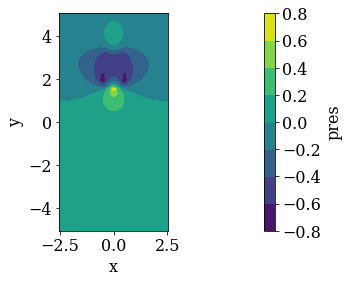

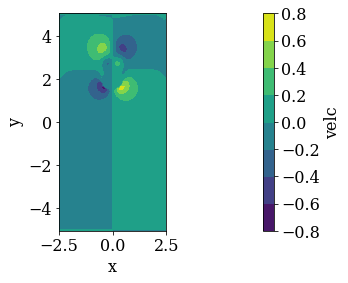

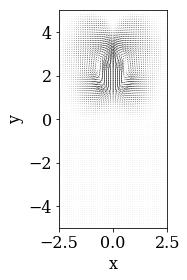

------------ Time = 2.010000000000001 ---------------
Number of poisson iterations    : 252
Final poisson residual : 9.391955951740298e-11
Max, Min, U   : 0.6698730626024928, -0.6702437287875989
Max, Min, V   : 0.458052418114418, -1.4972985001064587
Max, Min, P   : 0.6287923844106913, -1.5917726308263158
Max, Min, DIV : 4.710282858200188e-09, -5.6295035215456896e-09


------------ Time = 2.020000000000001 ---------------
Number of poisson iterations    : 253
Final poisson residual : 8.655905578209339e-11
Max, Min, U   : 0.6566118353602712, -0.6569706748859078
Max, Min, V   : 0.45789686485238495, -1.495574033242772
Max, Min, P   : 0.8765053048848521, -1.421344160397622
Max, Min, DIV : 5.966779691845826e-09, -5.619721662574861e-09


------------ Time = 2.0300000000000007 ---------------
Number of poisson iterations    : 245
Final poisson residual : 8.434029878513954e-11
Max, Min, U   : 0.6507717010105054, -0.6510644823422798
Max, Min, V   : 0.4576498597695955, -1.4934794716033741
Max, Mi

------------ Time = 2.2699999999999956 ---------------
Number of poisson iterations    : 274
Final poisson residual : 7.729881751208853e-11
Max, Min, U   : 0.66425853927571, -0.6635729701542736
Max, Min, V   : 0.4498691640870324, -1.494720520037095
Max, Min, P   : 0.8078842383086962, -1.1224784030195345
Max, Min, DIV : 4.445919923878883e-09, -4.454886083643398e-09


------------ Time = 2.2799999999999954 ---------------
Number of poisson iterations    : 297
Final poisson residual : 8.272547398378906e-11
Max, Min, U   : 0.6773546657497485, -0.6765656765832313
Max, Min, V   : 0.4483956261677243, -1.49530542154556
Max, Min, P   : 1.2007382000941709, -1.3214006843871915
Max, Min, DIV : 4.5597954578813216e-09, -4.6757085425674916e-09


------------ Time = 2.289999999999995 ---------------
Number of poisson iterations    : 292
Final poisson residual : 9.560845331052675e-11
Max, Min, U   : 0.6598472501612431, -0.6602573613901032
Max, Min, V   : 0.4482902469413493, -1.4970233636951191
Max, Min

------------ Time = 2.5199999999999902 ---------------
Number of poisson iterations    : 253
Final poisson residual : 8.265339628645394e-11
Max, Min, U   : 0.6538154838523809, -0.6541998526441887
Max, Min, V   : 0.4433668127405647, -1.4929970881501058
Max, Min, P   : 0.9192634388144513, -1.3912511311739193
Max, Min, DIV : 5.305748964677215e-09, -5.3415965489776035e-09


------------ Time = 2.52999999999999 ---------------
Number of poisson iterations    : 245
Final poisson residual : 7.454943916431652e-11
Max, Min, U   : 0.6537927945077726, -0.6540589217904929
Max, Min, V   : 0.4430541059637147, -1.494135575501462
Max, Min, P   : 0.7294297726767572, -1.2374756037339347
Max, Min, DIV : 4.5457127404672365e-09, -4.370080896980155e-09


------------ Time = 2.53999999999999 ---------------
Number of poisson iterations    : 249
Final poisson residual : 7.659529632853977e-11
Max, Min, U   : 0.6518606411095413, -0.6521141351585619
Max, Min, V   : 0.4425987454900857, -1.4948669181356962
Max, Mi

------------ Time = 2.759999999999985 ---------------
Number of poisson iterations    : 249
Final poisson residual : 9.432496766585384e-11
Max, Min, U   : 0.6402567252664791, -0.6405804243075561
Max, Min, V   : 0.43668795239080616, -1.4879929417396953
Max, Min, P   : 0.3761875323849047, -0.8383367632451699
Max, Min, DIV : 4.580596433840373e-09, -6.2874391656628226e-09


------------ Time = 2.769999999999985 ---------------
Number of poisson iterations    : 253
Final poisson residual : 7.324761342723405e-11
Max, Min, U   : 0.661865736183563, -0.6622731880975302
Max, Min, V   : 0.4373946100647524, -1.4891224964304706
Max, Min, P   : 0.8279546335987696, -1.093187743512989
Max, Min, DIV : 5.282998813047578e-09, -4.957878212358616e-09


------------ Time = 2.7799999999999847 ---------------
Number of poisson iterations    : 278
Final poisson residual : 9.367067391578855e-11
Max, Min, U   : 0.6747563250556903, -0.6751553800297526
Max, Min, V   : 0.4360461436507752, -1.4893924598814208
Max, M

------------ Time = 2.9899999999999802 ---------------
Number of poisson iterations    : 250
Final poisson residual : 7.80024760999119e-11
Max, Min, U   : 0.6571384393064572, -0.657599610318969
Max, Min, V   : 0.43208964556625945, -1.4849455830557416
Max, Min, P   : 1.0927802030607152, -0.8901931712697686
Max, Min, DIV : 4.284727243147879e-09, -6.487181858534641e-09


------------ Time = 2.99999999999998 ---------------
Number of poisson iterations    : 247
Final poisson residual : 8.889110250580538e-11
Max, Min, U   : 0.6664352249301777, -0.6668939748568475
Max, Min, V   : 0.432027111811948, -1.4839798821838428
Max, Min, P   : 0.8337714267489827, -0.7157042200107291
Max, Min, DIV : 5.235961331173655e-09, -4.5169297764992636e-09




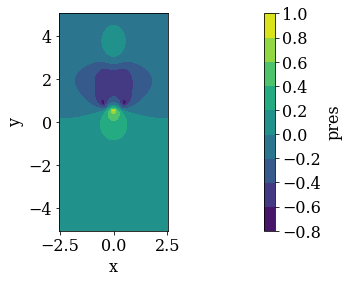

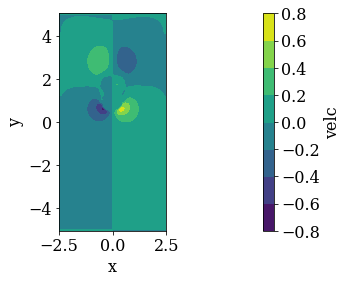

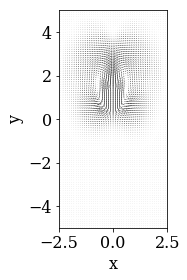

------------ Time = 3.00999999999998 ---------------
Number of poisson iterations    : 253
Final poisson residual : 9.071751680692041e-11
Max, Min, U   : 0.663879100332768, -0.6643311857947711
Max, Min, V   : 0.4320605146910889, -1.483424807765651
Max, Min, P   : 0.7160678001017422, -1.5255066936743182
Max, Min, DIV : 5.6729223987632416e-09, -6.706010406698493e-09


------------ Time = 3.0199999999999796 ---------------
Number of poisson iterations    : 256
Final poisson residual : 7.790783995025006e-11
Max, Min, U   : 0.6517542759344566, -0.6521901877444262
Max, Min, V   : 0.4318902068236354, -1.484070049598684
Max, Min, P   : 0.9332020138038862, -1.349974703621512
Max, Min, DIV : 4.471658078541996e-09, -5.618320932185977e-09


------------ Time = 3.0299999999999794 ---------------
Number of poisson iterations    : 251
Final poisson residual : 8.59939986004212e-11
Max, Min, U   : 0.6517267139499374, -0.6520814129329094
Max, Min, V   : 0.4317388922792271, -1.4845543368350087
Max, Min, 

------------ Time = 3.2599999999999745 ---------------
Number of poisson iterations    : 248
Final poisson residual : 8.004453251959377e-11
Max, Min, U   : 0.6380598065560712, -0.6383863487650954
Max, Min, V   : 0.4295067588526137, -1.478056524348168
Max, Min, P   : 0.38879691896161817, -0.8067145843940001
Max, Min, DIV : 4.286847713613762e-09, -4.709430762028788e-09


------------ Time = 3.2699999999999743 ---------------
Number of poisson iterations    : 253
Final poisson residual : 9.309680979018166e-11
Max, Min, U   : 0.6592280647975544, -0.6596357239918998
Max, Min, V   : 0.4296650980135641, -1.4787580361171342
Max, Min, P   : 0.8434876000933805, -1.0629369107024031
Max, Min, DIV : 5.585752971271063e-09, -5.109195427843716e-09


------------ Time = 3.279999999999974 ---------------
Number of poisson iterations    : 271
Final poisson residual : 9.17340751426602e-11
Max, Min, U   : 0.6717581446201709, -0.6721602428371181
Max, Min, V   : 0.4290952893332134, -1.4787925823276613
Max, M

------------ Time = 3.4999999999999694 ---------------
Number of poisson iterations    : 253
Final poisson residual : 8.426688604604111e-11
Max, Min, U   : 0.66492327712296, -0.6653407055127658
Max, Min, V   : 0.42683485308901553, -1.4730353646046372
Max, Min, P   : 0.8473956022015858, -0.6848741565506035
Max, Min, DIV : 4.99854924248741e-09, -5.3997520343962435e-09


------------ Time = 3.509999999999969 ---------------
Number of poisson iterations    : 253
Final poisson residual : 8.63253060291196e-11
Max, Min, U   : 0.6623228132419138, -0.6627325145055042
Max, Min, V   : 0.4269006014599735, -1.4729459788615922
Max, Min, P   : 0.7346999753230773, -1.484535568239907
Max, Min, DIV : 5.064572927704347e-09, -4.968959445295074e-09


------------ Time = 3.519999999999969 ---------------
Number of poisson iterations    : 252
Final poisson residual : 7.68162071794889e-11
Max, Min, U   : 0.650158261567522, -0.6505517394292949
Max, Min, V   : 0.4267624777467062, -1.4733552162061887
Max, Min, P

------------ Time = 3.7299999999999645 ---------------
Number of poisson iterations    : 245
Final poisson residual : 9.974003018935753e-11
Max, Min, U   : 0.6495873427628007, -0.6498782674121037
Max, Min, V   : 0.4245799995082952, -1.4688879396443526
Max, Min, P   : 0.7621888990738276, -1.1511058368545959
Max, Min, DIV : 4.239325615811723e-09, -5.647094434213171e-09


------------ Time = 3.7399999999999642 ---------------
Number of poisson iterations    : 244
Final poisson residual : 9.278125314444788e-11
Max, Min, U   : 0.6474003808897025, -0.6476842719059152
Max, Min, V   : 0.42445344026774373, -1.4680771212624655
Max, Min, P   : 0.579234731125157, -0.9925660699086216
Max, Min, DIV : 5.236243235881566e-09, -4.768272582333921e-09


------------ Time = 3.749999999999964 ---------------
Number of poisson iterations    : 246
Final poisson residual : 9.388426093157881e-11
Max, Min, U   : 0.6423093072521071, -0.6425857667231418
Max, Min, V   : 0.4243661512822328, -1.4671892762780727
Max, 

------------ Time = 3.979999999999959 ---------------
Number of poisson iterations    : 261
Final poisson residual : 9.086850733202821e-11
Max, Min, U   : 0.6687350000739599, -0.6690162046506226
Max, Min, V   : 0.4243265614682867, -1.4623256981984052
Max, Min, P   : 1.2436531314187054, -1.2323741116109028
Max, Min, DIV : 5.547610338989262e-09, -5.23541737740274e-09


------------ Time = 3.989999999999959 ---------------
Number of poisson iterations    : 253
Final poisson residual : 7.776623001852758e-11
Max, Min, U   : 0.654722349983907, -0.6550503625265391
Max, Min, V   : 0.42435714666216223, -1.4616091456491156
Max, Min, P   : 1.1278843100554758, -0.8208570039794165
Max, Min, DIV : 4.411717524285819e-09, -5.946425473551953e-09


------------ Time = 3.9999999999999587 ---------------
Number of poisson iterations    : 245
Final poisson residual : 9.882967513922464e-11
Max, Min, U   : 0.6637943018673972, -0.6641166635668037
Max, Min, V   : 0.4244082092656839, -1.4613024005583473
Max, Mi

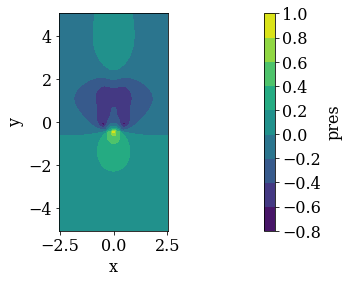

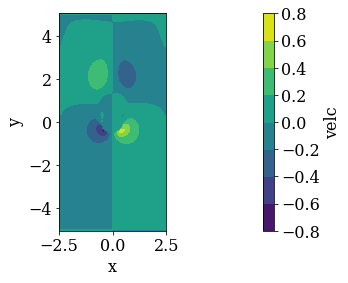

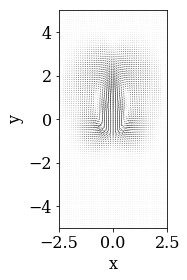

------------ Time = 4.009999999999959 ---------------
Number of poisson iterations    : 253
Final poisson residual : 7.629605586128612e-11
Max, Min, U   : 0.6611593710873293, -0.6614738661571162
Max, Min, V   : 0.4244650440012029, -1.4618047995094043
Max, Min, P   : 0.7534252152279893, -1.4487812228981445
Max, Min, DIV : 5.230656394128452e-09, -4.7009880224657685e-09


------------ Time = 4.019999999999959 ---------------
Number of poisson iterations    : 251
Final poisson residual : 8.530016662255562e-11
Max, Min, U   : 0.6489636202982199, -0.6492636791353669
Max, Min, V   : 0.424459102369812, -1.4619912182443753
Max, Min, P   : 0.9614680973537181, -1.283119564952289
Max, Min, DIV : 5.254508557428483e-09, -5.2148350221381534e-09


------------ Time = 4.0299999999999585 ---------------
Number of poisson iterations    : 245
Final poisson residual : 8.637242604391554e-11
Max, Min, U   : 0.6488989158128854, -0.6491386206382225
Max, Min, V   : 0.42445868275881604, -1.4620664416873685
Max, 

------------ Time = 4.259999999999954 ---------------
Number of poisson iterations    : 240
Final poisson residual : 9.375013886216418e-11
Max, Min, U   : 0.6351118011407628, -0.6352887579590815
Max, Min, V   : 0.42522848844474803, -1.4556406264664663
Max, Min, P   : 0.41317512407658535, -0.756981450941865
Max, Min, DIV : 4.67034529105792e-09, -5.8776946244148975e-09


------------ Time = 4.269999999999953 ---------------
Number of poisson iterations    : 253
Final poisson residual : 6.984705267515472e-11
Max, Min, U   : 0.6557228960867216, -0.6559394066934228
Max, Min, V   : 0.42527037490269026, -1.4558420006159993
Max, Min, P   : 0.875637472818787, -1.0106510194300151
Max, Min, DIV : 4.353654069200186e-09, -4.036209477753516e-09


------------ Time = 4.279999999999953 ---------------
Number of poisson iterations    : 261
Final poisson residual : 9.01160237456694e-11
Max, Min, U   : 0.6677678628318725, -0.6679737024517792
Max, Min, V   : 0.42515814283898307, -1.455569818738423
Max, Mi

------------ Time = 4.4999999999999485 ---------------
Number of poisson iterations    : 252
Final poisson residual : 8.060664613609048e-11
Max, Min, U   : 0.6629609655933467, -0.6631483269524444
Max, Min, V   : 0.4256393939899746, -1.4492175119878932
Max, Min, P   : 0.8750118957158014, -0.6344308579710367
Max, Min, DIV : 4.001092929195593e-09, -4.94136814799262e-09


------------ Time = 4.509999999999948 ---------------
Number of poisson iterations    : 249
Final poisson residual : 9.974927238262422e-11
Max, Min, U   : 0.6602990375722676, -0.6604794774515285
Max, Min, V   : 0.4256561733787494, -1.4494445615128584
Max, Min, P   : 0.7722502810944103, -1.4169613943135733
Max, Min, DIV : 5.073787861208101e-09, -5.1659019423278e-09


------------ Time = 4.519999999999948 ---------------
Number of poisson iterations    : 250
Final poisson residual : 8.974628199783382e-11
Max, Min, U   : 0.648078316801266, -0.6482480064076489
Max, Min, V   : 0.4256302198514872, -1.4494002710096552
Max, Min, 

------------ Time = 4.749999999999943 ---------------
Number of poisson iterations    : 245
Final poisson residual : 8.928928244940818e-11
Max, Min, U   : 0.6401858380835389, -0.6402578074986699
Max, Min, V   : 0.42586440053621333, -1.442808373807537
Max, Min, P   : 0.6539450163378288, -0.858773079424996
Max, Min, DIV : 5.0655046008457605e-09, -4.7380215445480545e-09


------------ Time = 4.759999999999943 ---------------
Number of poisson iterations    : 245
Final poisson residual : 9.613577352854e-11
Max, Min, U   : 0.6341602516916796, -0.6342258127328764
Max, Min, V   : 0.42586390948983, -1.4426768581602245
Max, Min, P   : 0.4250948788879872, -0.7370659138720879
Max, Min, DIV : 4.78260138350034e-09, -5.3583377318533465e-09


------------ Time = 4.769999999999943 ---------------
Number of poisson iterations    : 253
Final poisson residual : 9.048441435194843e-11
Max, Min, U   : 0.6546048751065047, -0.6546814873532534
Max, Min, V   : 0.4258596191307208, -1.4426478019752724
Max, Min, P

------------ Time = 4.989999999999938 ---------------
Number of poisson iterations    : 253
Final poisson residual : 8.892397904800078e-11
Max, Min, U   : 0.653424992436316, -0.6534663787296418
Max, Min, V   : 0.4257807492410801, -1.4360270459324973
Max, Min, P   : 1.1640841171230711, -0.7654092378486897
Max, Min, DIV : 4.989469523306034e-09, -5.186044330085515e-09


------------ Time = 4.999999999999938 ---------------
Number of poisson iterations    : 251
Final poisson residual : 9.987078681425378e-11
Max, Min, U   : 0.6623658532641757, -0.6624013453232074
Max, Min, V   : 0.4257635899242716, -1.4359346478221717
Max, Min, P   : 0.8890109022518301, -0.6134299733036535
Max, Min, DIV : 5.755468393542351e-09, -4.905831435531027e-09




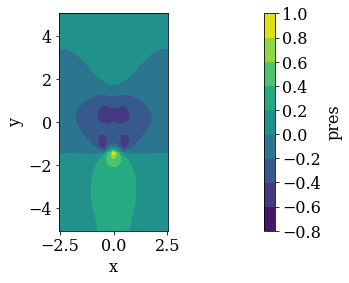

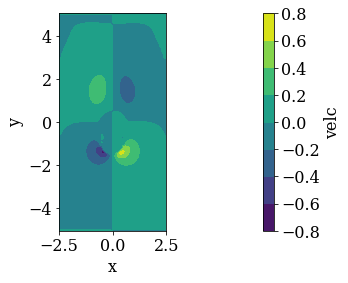

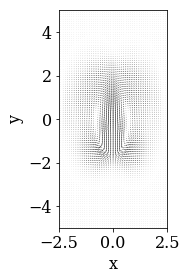

------------ Time = 5.009999999999938 ---------------
Number of poisson iterations    : 253
Final poisson residual : 8.545283642211316e-11
Max, Min, U   : 0.6596829500236976, -0.6597135160785169
Max, Min, V   : 0.4257276132613084, -1.4359394385543713
Max, Min, P   : 0.7911816251299979, -1.3886835051914623
Max, Min, DIV : 4.758398577942025e-09, -4.956578241593901e-09


------------ Time = 5.019999999999937 ---------------
Number of poisson iterations    : 252
Final poisson residual : 7.977067933873054e-11
Max, Min, U   : 0.6474419729438791, -0.6474668884723719
Max, Min, V   : 0.4256632790378634, -1.4357146956523539
Max, Min, P   : 0.9907486633349745, -1.2319514360201624
Max, Min, DIV : 4.962515760733449e-09, -5.0045140254084686e-09


------------ Time = 5.029999999999937 ---------------
Number of poisson iterations    : 243
Final poisson residual : 9.779696667114906e-11
Max, Min, U   : 0.647318520247911, -0.6473328361413563
Max, Min, V   : 0.42564449019278383, -1.4354103982952837
Max, M

------------ Time = 5.239999999999933 ---------------
Number of poisson iterations    : 246
Final poisson residual : 9.785238423746666e-11
Max, Min, U   : 0.6447621465911703, -0.6447268782967783
Max, Min, V   : 0.42546047379597096, -1.4292517415224584
Max, Min, P   : 0.6182635814226503, -0.9256126067879308
Max, Min, DIV : 4.675121512143221e-09, -4.525810004540887e-09


------------ Time = 5.2499999999999325 ---------------
Number of poisson iterations    : 241
Final poisson residual : 8.952385220425715e-11
Max, Min, U   : 0.6395324859969768, -0.6394927985874647
Max, Min, V   : 0.4254159417557091, -1.429071437677378
Max, Min, P   : 0.6675358955665898, -0.8385512874071228
Max, Min, DIV : 4.5446688322348106e-09, -4.483261106975889e-09


------------ Time = 5.259999999999932 ---------------
Number of poisson iterations    : 246
Final poisson residual : 8.04234761836425e-11
Max, Min, U   : 0.6334735923502957, -0.6334296563677719
Max, Min, V   : 0.4253839470636124, -1.4287831284088721
Max, M

------------ Time = 5.489999999999927 ---------------
Number of poisson iterations    : 252
Final poisson residual : 9.876492760140916e-11
Max, Min, U   : 0.6531120902149623, -0.6530123981976692
Max, Min, V   : 0.42485445082504125, -1.4221301593921007
Max, Min, P   : 1.1828069646502077, -0.741022892753865
Max, Min, DIV : 7.72483865069118e-09, -5.464307714642125e-09


------------ Time = 5.499999999999927 ---------------
Number of poisson iterations    : 249
Final poisson residual : 7.66247293288762e-11
Max, Min, U   : 0.6620119081807055, -0.6619079928552454
Max, Min, V   : 0.42488497657259433, -1.4218890497024332
Max, Min, P   : 0.903319301327622, -0.5941243247503126
Max, Min, DIV : 3.881300416480604e-09, -4.460708044259909e-09


------------ Time = 5.509999999999927 ---------------
Number of poisson iterations    : 243
Final poisson residual : 8.78804688678278e-11
Max, Min, U   : 0.6593141104609813, -0.6592080400375906
Max, Min, V   : 0.4248990347535598, -1.421737333530902
Max, Min, P

------------ Time = 5.739999999999922 ---------------
Number of poisson iterations    : 246
Final poisson residual : 9.703518105447986e-11
Max, Min, U   : 0.6444296741954322, -0.6443036632200297
Max, Min, V   : 0.4242324260568957, -1.41509021517792
Max, Min, P   : 0.6314838634746064, -0.9078466415414761
Max, Min, DIV : 5.014054310636951e-09, -5.3233050224810174e-09


------------ Time = 5.749999999999922 ---------------
Number of poisson iterations    : 232
Final poisson residual : 8.552160072433192e-11
Max, Min, U   : 0.6391716421027951, -0.6390441748905262
Max, Min, V   : 0.4242309739480916, -1.4147881452154347
Max, Min, P   : 0.681539275640415, -0.8200421763798927
Max, Min, DIV : 5.079977487276732e-09, -4.949451945512884e-09


------------ Time = 5.759999999999922 ---------------
Number of poisson iterations    : 244
Final poisson residual : 8.120411418911386e-11
Max, Min, U   : 0.6330860007049359, -0.6329572299889417
Max, Min, V   : 0.42422756097402026, -1.4143953089908339
Max, Min

------------ Time = 5.979999999999917 ---------------
Number of poisson iterations    : 273
Final poisson residual : 9.79836394468466e-11
Max, Min, U   : 0.6650058349482706, -0.6648110158868688
Max, Min, V   : 0.42354050159378187, -1.4082231188885883
Max, Min, P   : 1.2951150342568363, -1.1584889201181436
Max, Min, DIV : 5.15066045370105e-09, -4.882760731112976e-09


------------ Time = 5.989999999999917 ---------------
Number of poisson iterations    : 249
Final poisson residual : 8.873402963918802e-11
Max, Min, U   : 0.6532056476792539, -0.6530048987948734
Max, Min, V   : 0.4235129945293828, -1.4079861272318364
Max, Min, P   : 1.2028860220410935, -0.7181091639452298
Max, Min, DIV : 4.919171295997282e-09, -5.318266296100438e-09


------------ Time = 5.9999999999999165 ---------------
Number of poisson iterations    : 252
Final poisson residual : 9.593538374931917e-11
Max, Min, U   : 0.6620850229317633, -0.6618827061364083
Max, Min, V   : 0.4235894548783237, -1.407642819326984
Max, Min

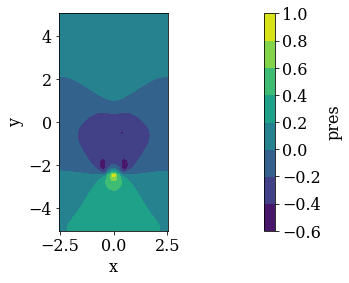

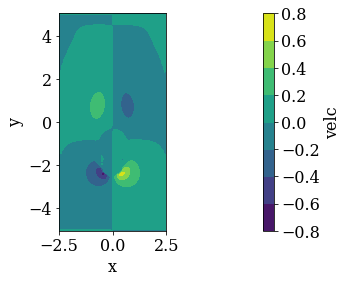

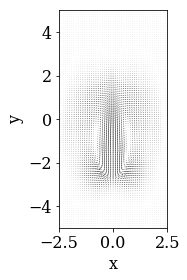

------------ Time = 6.009999999999916 ---------------
Number of poisson iterations    : 248
Final poisson residual : 7.64932766644207e-11
Max, Min, U   : 0.659382297511227, -0.6591808832473957
Max, Min, V   : 0.42368177042609106, -1.407379746995136
Max, Min, P   : 0.8306921889358119, -1.338623879289764
Max, Min, DIV : 4.733861549283125e-09, -4.409616222514345e-09


------------ Time = 6.019999999999916 ---------------
Number of poisson iterations    : 254
Final poisson residual : 9.960415721612637e-11
Max, Min, U   : 0.6471117352502758, -0.6469154443047078
Max, Min, V   : 0.42373061678242646, -1.4069499315743033
Max, Min, P   : 1.0223992059904998, -1.190240314266499
Max, Min, DIV : 5.443497735901914e-09, -6.6760761259498924e-09


------------ Time = 6.029999999999916 ---------------
Number of poisson iterations    : 244
Final poisson residual : 9.533913369341411e-11
Max, Min, U   : 0.6468750751532131, -0.6467139607831944
Max, Min, V   : 0.4237759108707348, -1.4064641484007385
Max, Min,

------------ Time = 6.239999999999911 ---------------
Number of poisson iterations    : 247
Final poisson residual : 9.920786487976701e-11
Max, Min, U   : 0.6446941287679101, -0.6445198617610324
Max, Min, V   : 0.42422663768955793, -1.4009732125342254
Max, Min, P   : 0.6461113649389899, -0.8916874317503097
Max, Min, DIV : 5.698927900768536e-09, -5.37634818609245e-09


------------ Time = 6.249999999999911 ---------------
Number of poisson iterations    : 239
Final poisson residual : 8.967008598344111e-11
Max, Min, U   : 0.6394118777933783, -0.639239403022101
Max, Min, V   : 0.4242784138712655, -1.400584412895641
Max, Min, P   : 0.6972515720848314, -0.8030748716306201
Max, Min, DIV : 4.742976913996166e-09, -4.937929631160243e-09


------------ Time = 6.259999999999911 ---------------
Number of poisson iterations    : 248
Final poisson residual : 8.719628869268803e-11
Max, Min, U   : 0.6333031844301497, -0.6331325959750624
Max, Min, V   : 0.4243195693623308, -1.4001175198499185
Max, Min,

------------ Time = 6.489999999999906 ---------------
Number of poisson iterations    : 252
Final poisson residual : 9.719531178550663e-11
Max, Min, U   : 0.654508966261297, -0.6542676802338157
Max, Min, V   : 0.4247595805015312, -1.3937516904314748
Max, Min, P   : 1.2278637967371535, -0.6966399487854518
Max, Min, DIV : 6.360479191946933e-09, -5.385724845263784e-09


------------ Time = 6.499999999999906 ---------------
Number of poisson iterations    : 271
Final poisson residual : 7.862004689970539e-11
Max, Min, U   : 0.6634154118372076, -0.6631757136790496
Max, Min, V   : 0.4247843699981342, -1.3933288374606563
Max, Min, P   : 0.9383076183830326, -0.5595703131320554
Max, Min, DIV : 4.584614901256834e-09, -5.494078247902934e-09


------------ Time = 6.509999999999906 ---------------
Number of poisson iterations    : 257
Final poisson residual : 8.45218303318983e-11
Max, Min, U   : 0.6607345321792143, -0.6604984922186262
Max, Min, V   : 0.42481144576358715, -1.392976383394788
Max, Min,

------------ Time = 6.729999999999901 ---------------
Number of poisson iterations    : 255
Final poisson residual : 9.230906962224025e-11
Max, Min, U   : 0.6492743910120689, -0.6490999273664244
Max, Min, V   : 0.4251386149705825, -1.3870357535502527
Max, Min, P   : 0.8613617983522841, -1.0217552418142177
Max, Min, DIV : 5.6490295774480614e-09, -4.533901934444806e-09


------------ Time = 6.739999999999901 ---------------
Number of poisson iterations    : 248
Final poisson residual : 8.266574484410003e-11
Max, Min, U   : 0.6468424652636848, -0.6466724414422994
Max, Min, V   : 0.4251387834713417, -1.3865949850427781
Max, Min, P   : 0.6664072157599829, -0.8776822900545705
Max, Min, DIV : 4.295068606330332e-09, -4.7515247292295726e-09


------------ Time = 6.7499999999999005 ---------------
Number of poisson iterations    : 241
Final poisson residual : 8.466567194085284e-11
Max, Min, U   : 0.6415341675985627, -0.6413688183680889
Max, Min, V   : 0.425135326330533, -1.386132371297752
Max, M

------------ Time = 6.959999999999896 ---------------
Number of poisson iterations    : 245
Final poisson residual : 9.005220558392397e-11
Max, Min, U   : 0.637603484087107, -0.6374609244204156
Max, Min, V   : 0.4253976990886083, -1.3804768960906044
Max, Min, P   : 0.49407097837033065, -0.6718508795376531
Max, Min, DIV : 4.544850103899156e-09, -4.982483967075346e-09


------------ Time = 6.969999999999896 ---------------
Number of poisson iterations    : 248
Final poisson residual : 9.10575806681795e-11
Max, Min, U   : 0.6591264081652995, -0.6589461200721354
Max, Min, V   : 0.42540629374277406, -1.3801716860142317
Max, Min, P   : 0.9827093130055942, -0.9027046266403688
Max, Min, DIV : 4.381359997029932e-09, -5.619448299049035e-09


------------ Time = 6.979999999999896 ---------------
Number of poisson iterations    : 277
Final poisson residual : 9.679608304051278e-11
Max, Min, U   : 0.6708224417766437, -0.6706509186758164
Max, Min, V   : 0.4253485656650842, -1.3796542061721975
Max, Mi

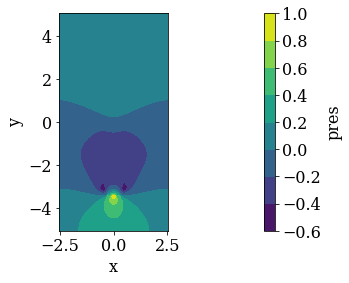

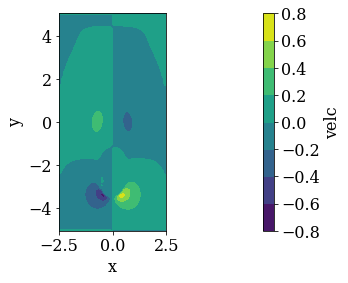

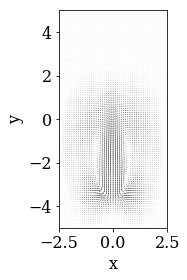

------------ Time = 7.009999999999895 ---------------
Number of poisson iterations    : 253
Final poisson residual : 9.439602461898442e-11
Max, Min, U   : 0.6666790830947699, -0.6664750854312345
Max, Min, V   : 0.4253821515611298, -1.3786641061505103
Max, Min, P   : 0.8945920244776793, -1.298982645695114
Max, Min, DIV : 4.729780928025562e-09, -5.039316047783515e-09


------------ Time = 7.019999999999895 ---------------
Number of poisson iterations    : 251
Final poisson residual : 8.820640782641348e-11
Max, Min, U   : 0.6543890850433627, -0.6541952165301347
Max, Min, V   : 0.42541627926724235, -1.3785622059055365
Max, Min, P   : 1.0819365496376778, -1.158299212635329
Max, Min, DIV : 5.271610814538974e-09, -4.463151237477092e-09


------------ Time = 7.0299999999998946 ---------------
Number of poisson iterations    : 258
Final poisson residual : 9.866926480290371e-11
Max, Min, U   : 0.6531938929235019, -0.6530454738614162
Max, Min, V   : 0.4254478062683373, -1.378416166815159
Max, Min

------------ Time = 7.23999999999989 ---------------
Number of poisson iterations    : 244
Final poisson residual : 9.273118144634364e-11
Max, Min, U   : 0.6558963084902466, -0.6557811807372093
Max, Min, V   : 0.4256364844566866, -1.3719389421795463
Max, Min, P   : 0.7090969766995189, -0.8686013483450802
Max, Min, DIV : 5.50201845195275e-09, -6.1788602012669e-09


------------ Time = 7.24999999999989 ---------------
Number of poisson iterations    : 246
Final poisson residual : 8.624402413203055e-11
Max, Min, U   : 0.6505418549490544, -0.6504332576338987
Max, Min, V   : 0.4256699170541122, -1.3718384507478283
Max, Min, P   : 0.7679789063753812, -0.7777762861803701
Max, Min, DIV : 5.3551562836928746e-09, -4.62207196127995e-09


------------ Time = 7.25999999999989 ---------------
Number of poisson iterations    : 242
Final poisson residual : 9.449987259726596e-11
Max, Min, U   : 0.6443603750350252, -0.6442581894768205
Max, Min, V   : 0.42569502162646194, -1.3716740586026048
Max, Min, P 

------------ Time = 7.479999999999885 ---------------
Number of poisson iterations    : 275
Final poisson residual : 8.870904482080783e-11
Max, Min, U   : 0.6912069689192848, -0.6911322838165209
Max, Min, V   : 0.42595247458400276, -1.365086738905662
Max, Min, P   : 1.4330775592869567, -1.1401519856500464
Max, Min, DIV : 4.6039444479006875e-09, -5.737358643731483e-09


------------ Time = 7.489999999999885 ---------------
Number of poisson iterations    : 254
Final poisson residual : 7.86621268076661e-11
Max, Min, U   : 0.6829626962146765, -0.6828389125494398
Max, Min, V   : 0.42596216840548223, -1.3650067951020486
Max, Min, P   : 1.3899352189353913, -0.6638736604186918
Max, Min, DIV : 4.729058186714319e-09, -6.3714556269856004e-09


------------ Time = 7.4999999999998845 ---------------
Number of poisson iterations    : 254
Final poisson residual : 9.40130284084093e-11
Max, Min, U   : 0.6928610617247969, -0.6927439867140694
Max, Min, V   : 0.42596956216693715, -1.364852328613075
Max, 

------------ Time = 7.71999999999988 ---------------
Number of poisson iterations    : 252
Final poisson residual : 8.900699848338769e-11
Max, Min, U   : 0.7038229680957074, -0.7037728461046446
Max, Min, V   : 0.4264515219979306, -1.3584868777719994
Max, Min, P   : 1.2981943616949754, -1.1644752645601943
Max, Min, DIV : 5.763417885301658e-09, -4.76176648675844e-09


------------ Time = 7.72999999999988 ---------------
Number of poisson iterations    : 241
Final poisson residual : 9.504460702312445e-11
Max, Min, U   : 0.695901786209261, -0.6958745797246382
Max, Min, V   : 0.42652051164156024, -1.3583490704542607
Max, Min, P   : 1.10193436498316, -1.0187040720215517
Max, Min, DIV : 4.7609941527387845e-09, -5.132743021406261e-09


------------ Time = 7.739999999999879 ---------------
Number of poisson iterations    : 249
Final poisson residual : 8.203990414362562e-11
Max, Min, U   : 0.6934835561145203, -0.693463121008968
Max, Min, V   : 0.4265820754758636, -1.3581556332073474
Max, Min, P 

------------ Time = 7.959999999999875 ---------------
Number of poisson iterations    : 249
Final poisson residual : 9.895140607524057e-11
Max, Min, U   : 0.7421484166906194, -0.7421526765696884
Max, Min, V   : 0.435316335079765, -1.3518171542308688
Max, Min, P   : 0.8411002511869328, -0.6872715977958685
Max, Min, DIV : 5.001729004930344e-09, -4.937130468340989e-09


------------ Time = 7.9699999999998745 ---------------
Number of poisson iterations    : 243
Final poisson residual : 9.311324678655568e-11
Max, Min, U   : 0.7705704194143181, -0.770620357846004
Max, Min, V   : 0.4379363997751378, -1.3517183141164821
Max, Min, P   : 1.2819469831836006, -0.9077512534757267
Max, Min, DIV : 5.76242761493595e-09, -4.804220606405285e-09


------------ Time = 7.979999999999874 ---------------
Number of poisson iterations    : 254
Final poisson residual : 8.686320515053425e-11
Max, Min, U   : 0.7848740098287046, -0.7849352673443722
Max, Min, V   : 0.4374390125967322, -1.3514115893868306
Max, Min,

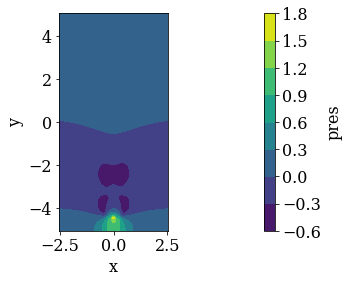

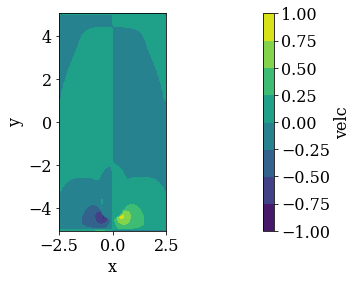

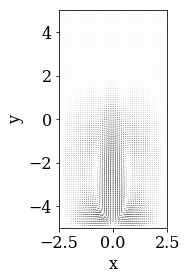

------------ Time = 8.009999999999874 ---------------
Number of poisson iterations    : 253
Final poisson residual : 7.453012926987561e-11
Max, Min, U   : 0.8071683012848446, -0.8072119895316322
Max, Min, V   : 0.4425141384692243, -1.3507664826707464
Max, Min, P   : 1.4336115345883658, -1.339616238834745
Max, Min, DIV : 5.209887070367625e-09, -5.130670055475406e-09




In [3]:
while scalars.variable['time'] <= scalars.variable['tmax']:
    
    imbound.map_to_grid(domain_data_struct)

    ins.advance(poisson, imbound, domain_data_struct)

    for particle in particles:
        particle.advance(scalars)

    scalars.advance()
    
    # Display stats
    if scalars.variable['nstep'] % 1 == 0:
        flowx.io.display_stats(scalars)  
        
    if scalars.variable['nstep'] % 100 == 0:
        flowx.io.plot_contour(gridc, 'pres')
        flowx.io.plot_contour(gridx, 'velc')
        flowx.io.plot_vector(gridx,gridy,'velc')
              

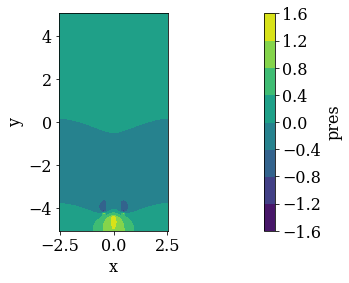

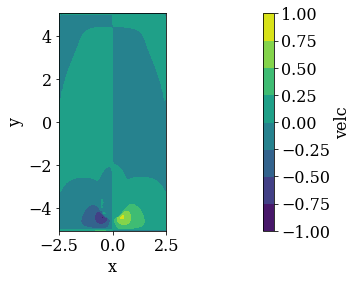

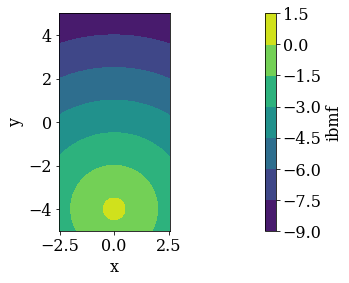

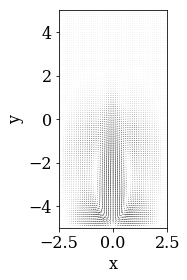

In [4]:
flowx.io.plot_contour(gridc, 'pres')
flowx.io.plot_contour(gridx, 'velc')
flowx.io.plot_contour(gridy, 'ibmf')
flowx.io.plot_vector(gridx,gridy,'velc')